In [ ]:
# **Lecture 4 Assignment**

Julian Miguel Roldan

BSCS-1

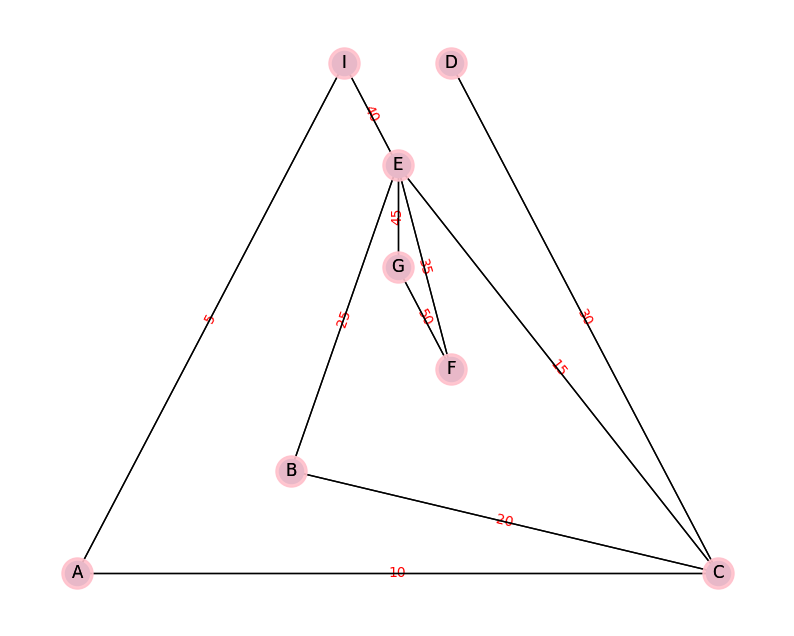

In [12]:
import matplotlib.pyplot as plt
import networkx as nx
seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A","B","C","D","E","F","G"])
# Add self-loops to the remaining nodes
edgelist = [("A","C"),("A","I"),("C","B"),("C","E"),("C","D"),("B","E"),("I","E"),("E","F"),("F","G"),("G","E")]
G.add_edges_from(edgelist)
pos = nx.planar_layout(G)  # Seed for reproducible layout
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45},
    font_color='red'
)
nx.draw(G, pos=pos,with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)

plt.show()

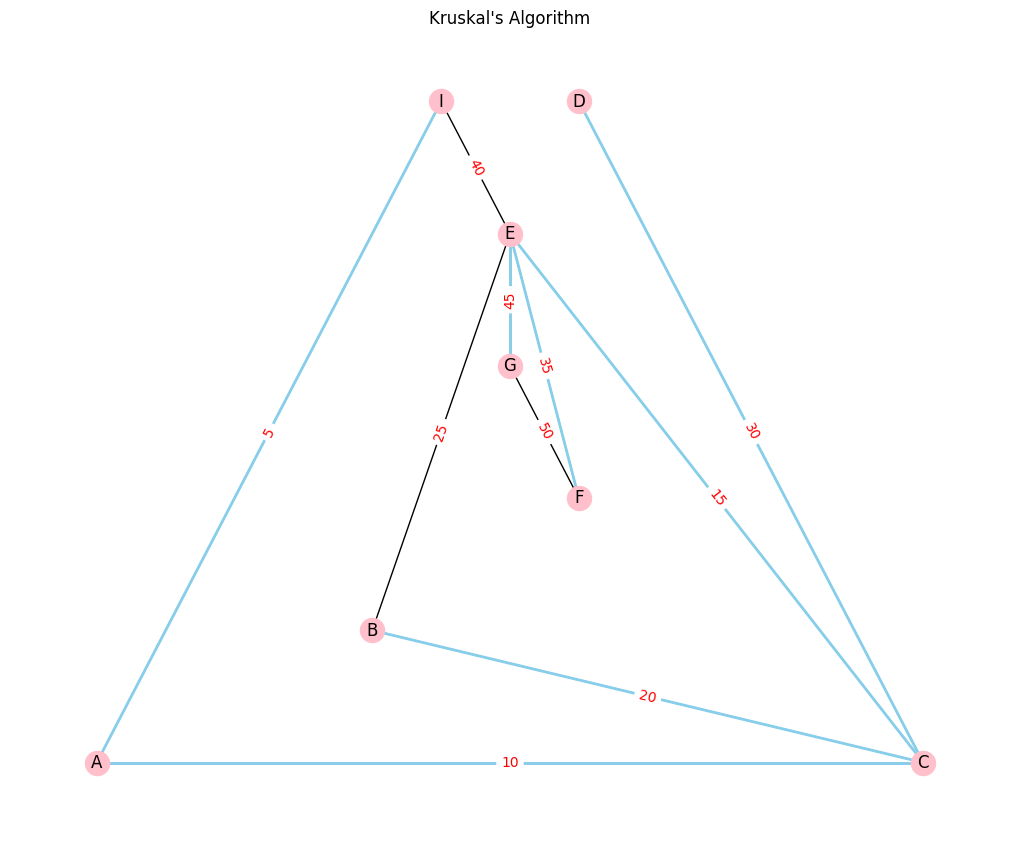

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
# Add self-loops to the remaining nodes
edgelist = [("A", "C"), ("A", "I"), ("C", "B"), ("C", "E"), ("C", "D"), ("B", "E"), ("I", "E"), ("E", "F"), ("F", "G"), ("G", "E")]
G.add_edges_from(edgelist)

# Define edge labels
edge_labels = {("A", "C"): 10, ("A", "I"): 5, ("C", "B"): 20, ("C", "E"): 15, ("C", "D"): 30, ("B", "E"): 25, ("I", "E"): 40, ("E", "F"): 35, ("F", "G"): 50, ("G", "E"): 45}

# Remove edge B-E from the list of edges considered for MST
edgelist_mst = edgelist.copy()
edgelist_mst.remove(("B", "E"))

# Construct the graph for MST without the edge B-E
G_mst = nx.Graph()
G_mst.add_nodes_from(G.nodes())
G_mst.add_edges_from(edgelist_mst)

# Compute the Minimum Spanning Tree using Kruskal's algorithm
mst_edges = nx.minimum_spanning_edges(G_mst, algorithm='kruskal', data=False)
mst = nx.Graph(mst_edges)

# Get positions for nodes
pos = nx.planar_layout(G)  # Seed for reproducible layout

# Draw the original graph
nx.draw(G, pos=pos, with_labels=True, node_color='pink')

# Draw the MST edges, highlighting in green
for u, v in mst.edges():
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color='skyblue', width=2)

# Draw edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("Kruskal's Algorithm")
plt.show()

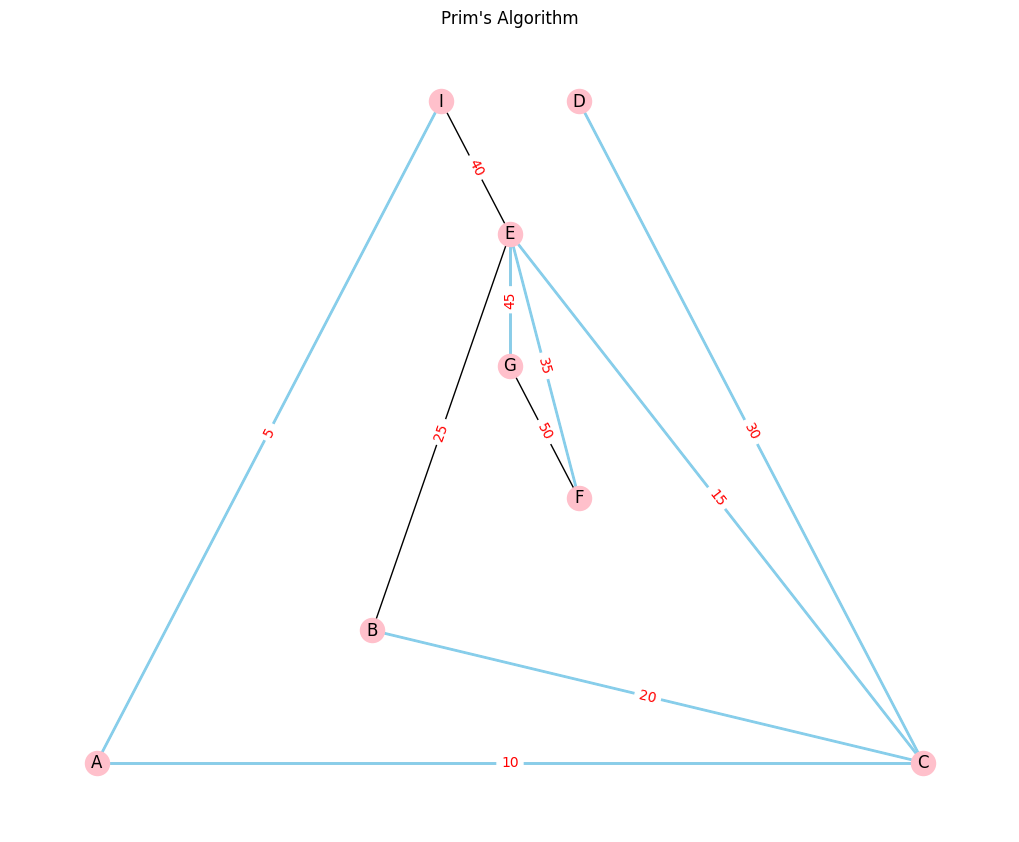

In [11]:
import matplotlib.pyplot as plt
import networkx as nx

seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "I"])
# Add self-loops to the remaining nodes
edgelist = [("A", "C"), ("A", "I"), ("C", "B"), ("C", "E"), ("C", "D"), ("B", "E"), ("I", "E"), ("E", "F"), ("F", "G"), ("G", "E")]
G.add_edges_from(edgelist)

# Define edge labels
edge_labels = {("A", "C"): 10, ("A", "I"): 5, ("C", "B"): 20, ("C", "E"): 15, ("C", "D"): 30, ("B", "E"): 25, ("I", "E"): 40, ("E", "F"): 35, ("F", "G"): 50, ("G", "E"): 45}

# Compute the Minimum Spanning Tree using Prim's algorithm
mst = nx.minimum_spanning_tree(G, algorithm='prim')

# Define edges to exclude from highlighting
edges_to_exclude = [("E", "B"), ("G", "F"), ("I", "E")]

# Remove excluded edges from the MST
for edge in edges_to_exclude:
    if mst.has_edge(*edge):
        mst.remove_edge(*edge)

# Define edges to highlight
edges_to_highlight = [("A", "I"), ("C", "B"), ("E", "G")]

# Add highlighted edges to the MST
mst.add_edges_from(edges_to_highlight)

# Get positions for nodes
pos = nx.planar_layout(G)  # Seed for reproducible layout

# Draw the original graph
nx.draw(G, pos=pos, with_labels=True, node_color='pink')

# Draw the MST edges, highlighting in green
nx.draw_networkx_edges(mst, pos=pos, edge_color='skyblue', width=2)

# Draw edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title("Prim's Algorithm")
plt.show()

Shortest paths from node 'A':
A: 0
B: 30
C: 10
D: 40
E: 25
F: 60
G: 70
I: 5


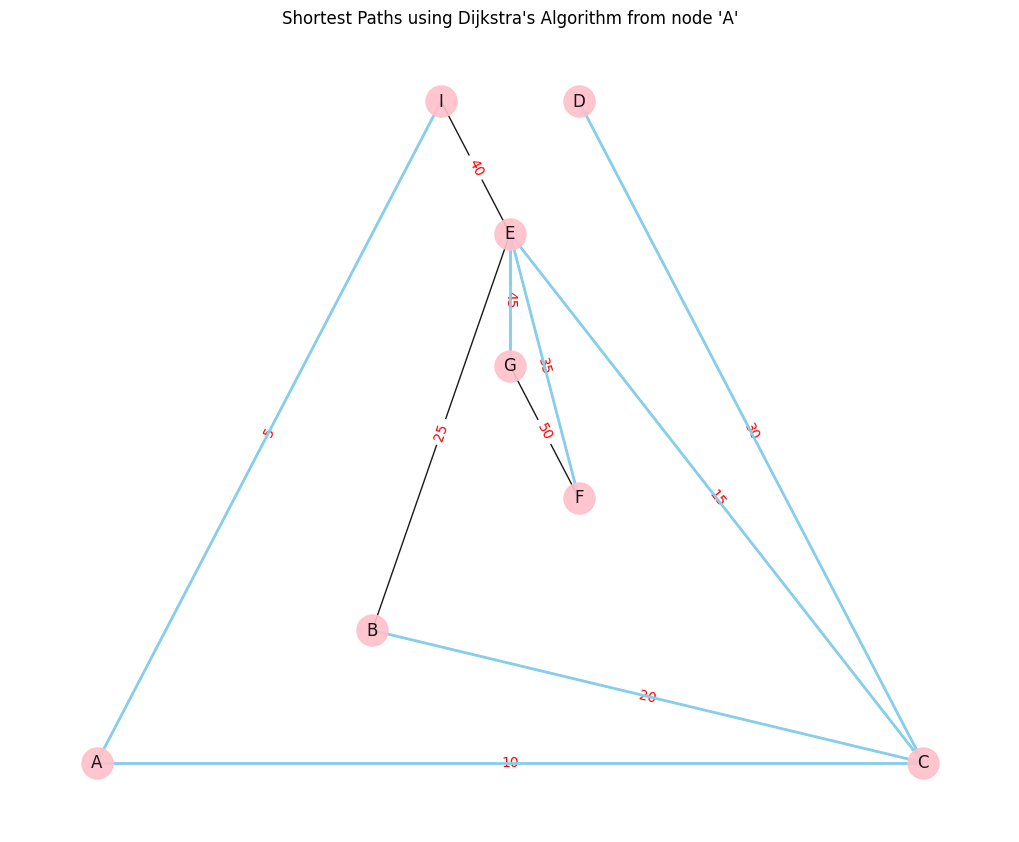

In [22]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq

# Initialize the graph
G = nx.Graph()

# Add nodes
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "I"])

# Add edges with weights
edgelist = [
    ("A", "C", 10),
    ("A", "I", 5),
    ("C", "B", 20),
    ("C", "E", 15),
    ("C", "D", 30),
    ("B", "E", 25),
    ("I", "E", 40),
    ("E", "F", 35),
    ("F", "G", 50),
    ("G", "E", 45)
]
G.add_weighted_edges_from(edgelist)

# Dijkstra's algorithm implementation
def dijkstra(G, start_node):
    shortest_paths = {node: float('inf') for node in G.nodes}
    shortest_paths[start_node] = 0
    visited = set()
    pq = [(0, start_node)]

    while pq:
        curr_dist, curr_node = heapq.heappop(pq)
        if curr_node in visited:
            continue

        visited.add(curr_node)
        for neighbor, data in G[curr_node].items():
            if neighbor not in visited:
                new_dist = curr_dist + data['weight']
                if new_dist < shortest_paths[neighbor]:
                    shortest_paths[neighbor] = new_dist
                    heapq.heappush(pq, (new_dist, neighbor))

    return shortest_paths

# Compute shortest paths from node 'A'
shortest_paths = dijkstra(G, 'A')

# Print shortest paths
print("Shortest paths from node 'A':")
for node, dist in shortest_paths.items():
    print(f"{node}: {dist}")

# Draw the graph with shortest paths
plt.figure(figsize=(10, 8))
pos = nx.planar_layout(G)

# Draw all edges
nx.draw(G, pos, with_labels=True, node_color='pink', edge_color='black', node_size=500, alpha=0.9)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, font_color='red')

# Highlight shortest paths
shortest_path_edges = [(node, neighbor) for node in shortest_paths for neighbor, data in G[node].items() if shortest_paths[neighbor] == shortest_paths[node] + data['weight']]
nx.draw_networkx_edges(G, pos, edgelist=shortest_path_edges, edge_color='skyblue', width=2)

plt.title("Shortest Paths using Dijkstra's Algorithm from node 'A'")
plt.show()